In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
appliance = 'KETTLE'
train_set = '[2]'
epochs = 12
batch = 285

Batch 285 did no appear in epoch 0


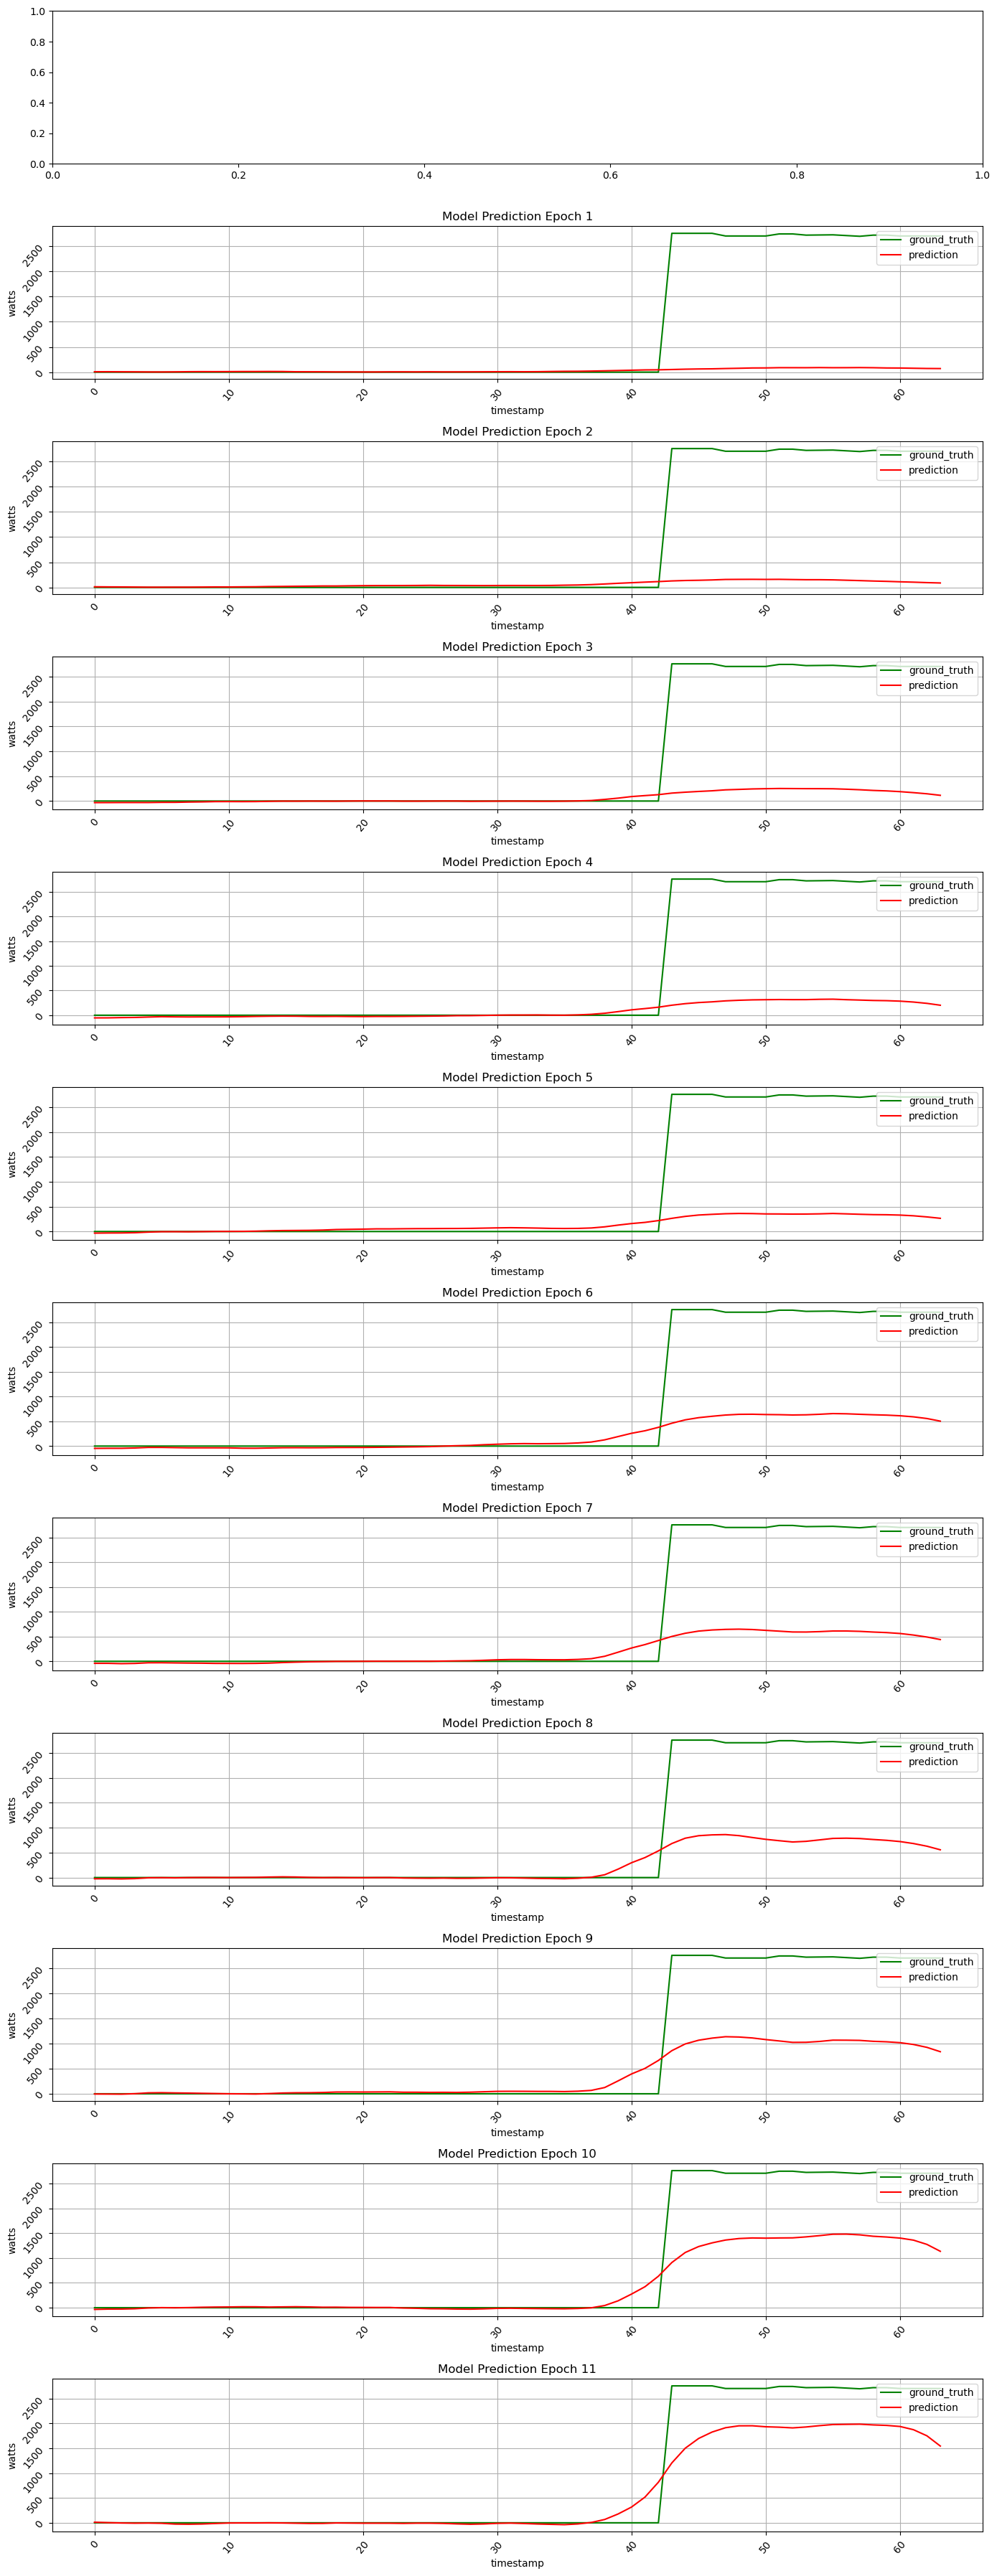

In [117]:
def get_data_to_plot(epoch):
    try:
        tmp_df = pd.read_csv(f'experiments/{appliance}/{train_set}/training/epoch_{epoch}_batch_{batch}.csv')
        # tmp_df.index = tmp_df['time']
        time = tmp_df['time']
        gt = tmp_df['ground_truth']
        pred = tmp_df['prediction']
        return [time, gt, pred]
    except Exception:
        return 0

fig, axs = plt.subplots(nrows=epochs, figsize=(14,epochs*3), sharex=False, sharey=False)

for epoch in np.arange(0,epochs):
    data = get_data_to_plot(epoch)
    if data == 0:
        print(f"Batch {batch} did no appear in epoch {epoch}")
    else:
        y1 = data[1]
        y2 = data[2]
        axs[epoch].plot(y1, color = 'green', label = 'ground_truth')
        axs[epoch].plot(y2, color = 'red', label = 'prediction')
        axs[epoch].set_title(f'Model Prediction Epoch {epoch}')
        axs[epoch].set_xlabel('timestamp')
        axs[epoch].set_ylabel('watts')
        axs[epoch].tick_params(rotation=50)
        axs[epoch].grid(True)
        axs[epoch].legend(loc='upper right')
        fig.tight_layout()